# Week 3 Problem 4

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do not write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select *Kernel*, and restart the kernel and run all cells (*Restart & Run all*).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select *File* → *Save and CheckPoint*)

5. When you are ready to submit your assignment, go to *Dashboard* → *Assignments* and click the *Submit* button. Your work is not submitted until you click *Submit*.

6. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

7. **If your code does not pass the unit tests, it will not pass the autograder.**

# Due Date: 6 PM, February 5, 2018

In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve
from nose.tools import assert_equal, assert_in, assert_is_not, assert_is_instance
from numpy.testing import assert_array_equal, assert_array_almost_equal
from pandas.util.testing import assert_frame_equal, assert_index_equal

# Boosting versus Bagging

As you may have already learned, ensemble learning helps improve machine learning results by combining several models. Ensemble methods often perform very well and have won numerous machine learning competitions. Whether boosting or bagging achieve the best result really depends on the data. While both bagging and boosting decrease the variance of your single estimate, there are a lot of differences. One of the biggest is that only boosting tries to reduce bias. However, bagging may be better to avoid over-fitting.

In this assignment, you will compare different boosting and bagging models to see their trade-offs. Let us use the Wisconsin Breast Cancer dataset which you should already be familiar with.

In [2]:
# Load in the dataset as a Pandas DataFrame
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add in the target (labels)
df['target'] = data.target

# Preview the first few lines
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Split the DataFrame into a DataFrame of features and a Series of labels
cancer_df = df[df.columns[:-1]]
labels = df.target

# Perform a 70/30 train-test-split
X_train, X_test, y_train, y_test = train_test_split(cancer_df, 
                                                    labels, 
                                                    test_size=0.3,
                                                    random_state=10)

## Question 1

Create a function called `train_predict` which trains a specified classifier model and return the predicted class labels from the testing set along with the fitted model.

Your function should take an input called `classifier_model` which is a string corresponding as follows sklearn model:
- "bagging" : [BaggingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
- "random_forest": [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- "gradient_boost": [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
- "adaboost" : [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

Note, use the default parameters for all of the model (i.e., you do not need to specify any model parameters).

In [4]:
def train_predict(classifier_model, X_train, y_train, X_test):
    '''    
    Parameters
    ----------
    classifier_model: A String specifying the type of classifier
    X_train: A pandas.DataFrame of the features
    y_train: A pandas.Series of the labels
    X_test: A pandas.DataFrame of the features
    
    Returns
    -------
    model: A ensemble.BaggingClassifier instance
    prediction: A numpy array
    '''
    # YOUR CODE HERE
    if classifier_model is 'bagging':
        model = BaggingClassifier()
    elif classifier_model is 'random_forest':
        model = RandomForestClassifier()
    elif classifier_model is 'gradient_boost':
        model = GradientBoostingClassifier()
    else:
        model = AdaBoostClassifier()

    model = model.fit(X_train, y_train)
    
    result = model.predict(X_test)

    return model, result

In [5]:
# Train and predict using the cancer dataset
bagging_model, bagging_pred = train_predict("bagging", X_train, y_train, X_test)
rf_model, rf_pred = train_predict("random_forest", X_train, y_train, X_test)
gb_model, gb_pred = train_predict("gradient_boost", X_train, y_train, X_test)
adaboost_model, adaboost_pred = train_predict("adaboost", X_train, y_train, X_test)

In [6]:
assert_equal(isinstance(bagging_model, BaggingClassifier), True)
assert_equal(isinstance(bagging_pred, np.ndarray), True)
assert_equal(len(bagging_pred), 171)

assert_equal(isinstance(rf_model, RandomForestClassifier), True)
assert_equal(isinstance(rf_pred, np.ndarray), True)
assert_equal(len(rf_pred), 171)


## Question 2

Write a function call `compute_metric` which takes the predicted and true labels (`y_test`) and compute an inputted `metric_name`. Your function should consider the following:
- `precision` : tp / (tp + fp) where tp is true positive and fp is false positive.
- `recall` : tp / (tp + fn) where fn is false negative.
- `accuracy`: Accuracy
- `f1score` : 2 * (precision * recall) / (precision + recall)

__Hint__: You are free to use the built-in _sklearn.metrics_ functions or compute the metrics directly.

In [7]:
def compute_metric(predicted_labels, true_labels, metric_name):
    '''
    Parameters
    ----------
    predicted_labels: A numpy.ndarray
    true_labels: A numpy.ndarray
    metric_name: A String
    
    Returns
    -------
    result: A numpy.float64
    '''
    # YOUR CODE HERE
    
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels)
    f1score = f1_score(true_labels, predicted_labels)

    if metric_name is 'precision':
        result = precision
    elif metric_name is 'recall':
        result = recall
    elif metric_name is 'accuracy':
        result = accuracy
    else:
        result = f1score
        
    return result

In [8]:
# Lets test your function
bagging_recall = compute_metric(y_test, bagging_pred, 'recall')
adaboost_accuracy = compute_metric(y_test, adaboost_pred, 'accuracy')
rf_f1score = compute_metric(y_test, rf_pred, 'f1score')
gradboost_precision = compute_metric(y_test, gb_pred, 'precision')

In [9]:
assert_equal(type(bagging_recall), np.float64)
assert_equal(0 <= bagging_recall <= 1, True)
assert_equal(type(adaboost_accuracy), np.float64)
assert_equal(0 <= adaboost_accuracy <= 1, True)
assert_equal(type(rf_f1score), np.float64)
assert_equal(0 <= rf_f1score <= 1, True)
assert_equal(type(gradboost_precision), np.float64)
assert_equal(0 <= gradboost_precision <= 1, True)


While we can simply use the directly accuracy, precision, recall and f1-score to compare between the models, it is often easier to visualize the model performance using the ROC curve.

In the example below, we plot the ROC curve for Random Forest to compare it with a random classifier. We also compute the AUC.

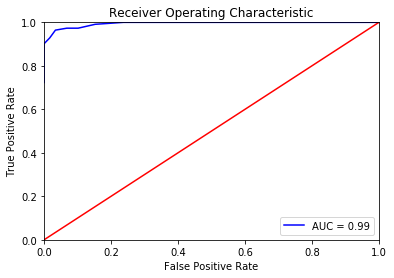

In [10]:
# Obtain the predicted probabities
rf_probs = rf_model.predict_proba(X_test)

# Compute the true positive rate and the false positive rate
rf_fpr, rf_tpr, threshold = roc_curve(y_test, rf_probs[:,1])

fig, ax = plt.subplots() 

# Plot the ROC curve
ax.plot(rf_fpr, rf_tpr, 'blue', label = 'AUC = %0.2f' % auc(rf_fpr, rf_tpr))

# Plot the random classifier
ax.plot([0, 1], [0, 1],'red')

# Create a legend
ax.legend(loc = 'lower right')

# Set the axes limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Plot title and axes labels
ax.set_title('Receiver Operating Characteristic')
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate');

## Question 3

Create a function called `plot_ROC` that takes a the test set of features and true labels to plot the ROC curve of all four models and a random classifier.

Your plot needs to satisfy the following requirements to pass all assertions:

- Set the x-axis and y-axis to be between 0 and 1.
- Your plot should have 5 ROC curves (4 for each models and 1 for the random classifier)
- Make sure all five curves have different colors.
- Make sure you've created the legend.
- Add a title to your plot.
- Add a label to the x-axis and y-axis.
- Make sure your function returns a matplotlib.Axes object (call it ax). The reason we write our function to return an Axes instance is because it can be used to extract data values for testing.


__Hint:__ Use the example above as a reference. You do not need to compute the AUC as shown in the example but it is nice to have.

In [11]:
def plot_ROC(X_test, y_test):
    '''    
    Parameters
    ----------
    X_test: A pandas.DataFrame of the features
    y_test: A numpy.ndarray
    
    Returns
    -------
    ax: A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    bagging_prob = bagging_model.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)
    gb_prob = gb_model.predict_proba(X_test)
    adaboost_prob = adaboost_model.predict_proba(X_test)
        
    bagging_fpr, bagging_tpr, threshold = roc_curve(y_test, bagging_prob[:,1])
    rf_fpr, rf_tpr, threshold = roc_curve(y_test, rf_prob[:,1])
    gb_fpr, gb_tpr, threshold = roc_curve(y_test, gb_prob[:,1])
    adaboost_fpr, adaboost_tpr, threshold = roc_curve(y_test, adaboost_prob[:,1])
       
    fig, ax = plt.subplots() 
    
    ax.plot(bagging_fpr, bagging_tpr, 'blue', label = 'Bagging AUC= %0.2f' % auc(bagging_fpr, bagging_tpr))
    ax.plot(rf_fpr, rf_tpr, 'pink', label = 'RandomForest AUC = %0.2f' % auc(rf_fpr, rf_tpr))
    ax.plot(gb_fpr, gb_tpr, 'yellow', label = 'GradientBoost AUC = %0.2f' % auc(gb_fpr, gb_tpr))
    ax.plot(adaboost_fpr, adaboost_tpr, 'green', label = 'Adaboost AUC = %0.2f' % auc(adaboost_fpr, adaboost_tpr))
    
    # Plot the random classifier
    ax.plot([0, 1], [0, 1],'red')

    # Create a legend
    ax.legend(loc = 'lower right')

    # Set the axes limits
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    # Plot title and axes labels
    ax.set_title('Receiver Operating Characteristic')
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate');
    return ax

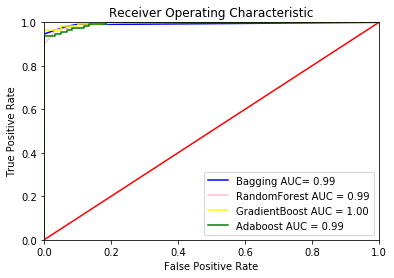

In [12]:
# Call the function
ax = plot_ROC(X_test, y_test)

In [13]:
# Check to see if an Axes object is returned
assert_is_instance(
    ax, mpl.axes.Axes,
    msg="Your function should return a matplotlib.axes.Axes object."
)

# Check if the title is set
assert_is_not(
    len(ax.title.get_text()), 0,
    msg="Your plot doesn't have a title."
)

# Check if the x-axis has a label.
assert_is_not(
    ax.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive."
)

# Check if the y-axis has a label.
assert_is_not(
    ax.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive."
)

# Check the x-axis limit
assert_equal(ax.get_xlim(), (0,1),
             msg="Change the x-axis limit to be (0,1)"
)

# Check the y-axis limit
assert_equal(ax.get_ylim(), (0,1),
             msg="Change the y-axis limit to be (0,1)"
)

# Check the numbers of ROC curves plotted
assert_equal(len(ax.lines), 5,
             msg="Make sure to plot the 4 models' and the random classifier's ROC curve.")

# Check if legend exists
assert_equal(len(ax.get_legend_handles_labels()) > 0, True,
             msg="Make sure you create a legend."
)

# Check to see if each curve is of different color
colors = []
for i in range(0,5):
    colors.append(ax.lines[i].get_color())
assert_equal(len(list(set(colors))), 5,
             msg="Make sure the colors of each curve is unique.")